# Week 9 — Day 5: Baseline Model (Logistic Regression)

In [1]:
# imports
import joblib
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# load artifacts
ARTIFACTS_DIR = Path("..") / "models"

preprocess = joblib.load(ARTIFACTS_DIR / "preprocess_v1.joblib")
X_train, X_test, y_train, y_test = joblib.load(ARTIFACTS_DIR / "split_v1.joblib")

print("Loaded split and preprocess.")
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Loaded split and preprocess.
Train: (227845, 30) (227845,)
Test: (56962, 30) (56962,)


In [3]:
# apply preprocessing
X_train_scaled = preprocess.transform(X_train)
X_test_scaled = preprocess.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((227845, 30), (56962, 30))

### Train the Model

In [4]:
# train baseline model
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000)

baseline_model.fit(X_train_scaled, y_train)
print("Baseline model trained.")

Baseline model trained.


In [5]:
# prediction
y_pred = baseline_model.predict(X_test_scaled)
y_prob = baseline_model.predict_proba(X_test_scaled)[:, 1]  # probability of fraud (class 1)

print("Predictions done.")

Predictions done.


### Evaluation

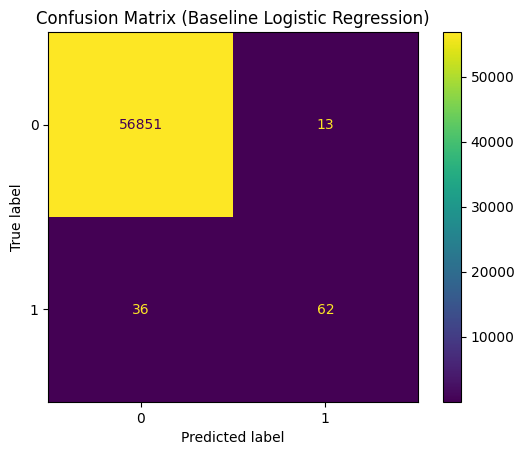

array([[56851,    13],
       [   36,    62]])

In [6]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Baseline Logistic Regression)")
plt.show()

cm

In [7]:
# Precision / Recall / F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Precision: 0.8267
Recall:    0.6327
F1-score:  0.7168


In [8]:
# PR-AUC
from sklearn.metrics import average_precision_score, precision_recall_curve

pr_auc = average_precision_score(y_test, y_prob)
print(f"PR-AUC (Average Precision): {pr_auc:.4f}")

PR-AUC (Average Precision): 0.7414


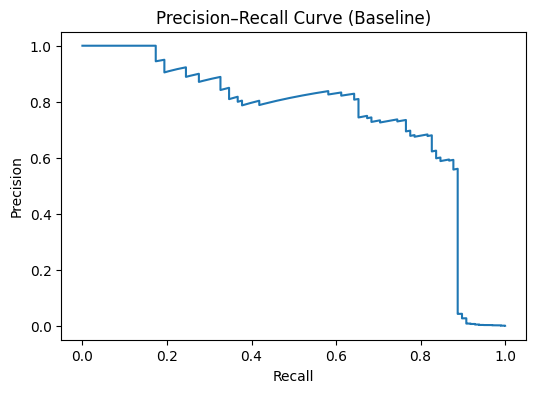

In [9]:
# plot precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recalls, precisions)
plt.title("Precision–Recall Curve (Baseline)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [10]:
# save model 
joblib.dump(baseline_model, ARTIFACTS_DIR / "logreg_baseline_v1.joblib")
print("Saved baseline model: logreg_baseline_v1.joblib")

Saved baseline model: logreg_baseline_v1.joblib


In [11]:
# save metrics
results = pd.DataFrame([{
    "model": "Logistic Regression (baseline)",
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "pr_auc": pr_auc
}])

results

,model,precision,recall,f1,pr_auc
0,Logistic Regression (baseline),0.826667,0.632653,0.716763,0.741382


In [12]:
# results saving as a CSV file 
results.to_csv(Path("..") / "reports" / "baseline_results.csv", index=False)
print("Saved: reports/baseline_results.csv")

Saved: reports/baseline_results.csv
